In [1]:
from catboost import CatBoostClassifier, Pool, cv
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from train_val_split import train_validation_split
import ggplot as gplt
from tools.mean_encoder import *
import seaborn as sns

C:\Users\S\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\S\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\S\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
train_set = pd.read_csv("dataset/train_val/training_set.csv")
test_set = pd.read_csv("dataset/train_val/testing_set.csv")

#airport_me = pd.read_csv("./feature_extraction/features/airport_mean_encoding.csv")
#train_set = pd.merge(train_set, airport_me, on="order_id", how="left")

"""train_ae_feature = pd.read_csv("./feature_extraction/train_ae_feature.csv")
train_set = pd.merge(train_set, train_ae_feature, on="order_id", how="left")"""

#long_weekend_feat = pd.read_csv("./feature_extraction/features/long_weekend_feature_2.csv")
train_set["group_id"] = train_set["group_id"].astype(str)
#train_set = pd.merge(train_set, long_weekend_feat, on="group_id", how="left")
#unit_group_count = train_set.groupby(["unit", "group_id"])["order_id"].count().reset_index()
#unit_group_count.rename({"order_id": "process_count"}, axis="columns", inplace=True)
#train_set = pd.merge(train_set, unit_group_count, on=["unit", "group_id"], how="left")


"""same_month_group_ratio = pd.read_csv("./feature_extraction/features/same_month_group_ratio.csv")
train_set = pd.merge(train_set, same_month_group_ratio, on="group_id", how="left")"""

group_price_days = pd.read_csv("./feature_extraction/features/group_days_price.csv")
train_set = pd.merge(train_set, group_price_days, on="group_id", how="left")

time_duration = pd.read_csv("./feature_extraction/features/time_duration_feature.csv")
train_set = pd.merge(train_set, time_duration, on="order_id", how="left")

y_train = train_set["deal_or_not"]
for table in [train_set, test_set]:
    table.drop(columns=["deal_or_not", "group_id", "order_id"], inplace=True)
    
train_set["accum_count_ratio"] = train_set["accum_order"] / train_set["group_id_count"]
    
train_x, val_x, train_y, val_y = train_test_split(train_set, y_train, random_state=104702016,
                                                  shuffle=True, stratify=y_train)
cv = StratifiedKFold(5, shuffle=True, random_state=851206)
#mean_enc_col = ["source1_unit", "area", 'source1_source2', 'source1_source2_unit',
#                'source2_unit'] # 這個column是catboost feature importance最高的feature
mean_enc_col = ["source1_unit"]
#mean_enc_col = list(train_set.columns[cat_feature])
train_x = mean_encoder(train_x, train_y, mean_enc_col, "deal_or_not", cv)
val_x = test_set_encoder(train_x, train_y, val_x, mean_enc_col, "deal_or_not")

drop_col = ['source1_source2', 'source1_unit', 'source2_unit',
       'source1_source2_unit', 'order_month', 'order_quarter', 'subline_area',
       'begin_month', 'begin_quarter', 'abroad_airport', 'home_airport',
       'abroad_hour', 'abroad_part_of_day', 'abroad_DoY', 'abroad_DoW',
       'abroad_DoM', 'home_DoW', 'home_DoM', 'home_DoY', 'home_hour',
       'home_part_of_day']
drop_col += [x for x in train_x.columns if "prod_vec" in x]
for table in [train_x, val_x]:
    table.drop(columns=drop_col, inplace=True)

#and "DoY" not in col
cat_feature = []
key_words = ["source", "unit", "sub", "area", "order", "begin", "_airport",
             "abroad", "home"]
for i, col in enumerate(train_x.columns):
    for kw in key_words:
        if kw in col and "duration" not in col and "DoY" not in col and "target" not in col \
         and "accum" not in col and "_z" not in col and i not in cat_feature:
            cat_feature.append(i)

#train_x.drop(columns=mean_enc_col, inplace=True)
#val_x.drop(columns=mean_enc_col, inplace=True)

C:\Users\S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\S\travel_data\tools\mean_encoder.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  input_table[target] = y
C:\Users\S\travel_data\tools\mean_encoder.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x_val[colname] = means
C:\Users\S\travel_data\tools\mean_encoder.py:25: SettingWithCopyWar

In [25]:
train_set = pd.read_csv("dataset/train_val/training_set.csv")
test_set = pd.read_csv("dataset/train_val/testing_set.csv")

#airport_me = pd.read_csv("./feature_extraction/features/airport_mean_encoding.csv")
#train_set = pd.merge(train_set, airport_me, on="order_id", how="left")

"""train_ae_feature = pd.read_csv("./feature_extraction/train_ae_feature.csv")
train_set = pd.merge(train_set, train_ae_feature, on="order_id", how="left")"""

#long_weekend_feat = pd.read_csv("./feature_extraction/features/long_weekend_feature_2.csv")
train_set["group_id"] = train_set["group_id"].astype(str)
#train_set = pd.merge(train_set, long_weekend_feat, on="group_id", how="left")

In [40]:
unit_count.rename({"unit":"count",
                   "index": "unit"}, index="columns", inplace=True)

In [4]:
train_set = pd.read_csv("dataset/train_val/training_set.csv")
test_set = pd.read_csv("dataset/train_val/testing_set.csv")

#airport_me = pd.read_csv("./feature_extraction/features/airport_mean_encoding.csv")
#train_set = pd.merge(train_set, airport_me, on="order_id", how="left")

"""train_ae_feature = pd.read_csv("./feature_extraction/train_ae_feature.csv")
train_set = pd.merge(train_set, train_ae_feature, on="order_id", how="left")"""

#long_weekend_feat = pd.read_csv("./feature_extraction/features/long_weekend_feature_2.csv")
train_set["group_id"] = train_set["group_id"].astype(str)
#train_set = pd.merge(train_set, long_weekend_feat, on="group_id", how="left")



"""same_month_group_ratio = pd.read_csv("./feature_extraction/features/same_month_group_ratio.csv")
train_set = pd.merge(train_set, same_month_group_ratio, on="group_id", how="left")"""

group_price_days = pd.read_csv("./feature_extraction/features/group_days_price.csv")
train_set = pd.merge(train_set, group_price_days, on="group_id", how="left")

y_train = train_set["deal_or_not"]
for table in [train_set, test_set]:
    table.drop(columns=["deal_or_not"], inplace=True)
    
train_set["accum_count_ratio"] = train_set["accum_order"] / train_set["group_id_count"]
    
train_x, val_x, train_y, val_y = train_test_split(train_set, y_train, random_state=104702016,
                                                  shuffle=True, stratify=y_train)


unit_group_count = train_x.groupby(["unit", "group_id"])["order_id"].count().reset_index()
unit_group_count.rename({"order_id": "process_count"}, axis="columns", inplace=True)
unit_count = train_x.unit.value_counts().reset_index()
unit_count.columns = ["unit", "count"]
unit_group_count = pd.merge(unit_group_count, unit_count, on="unit", how="left")
unit_group_count["process_rate"] = unit_group_count["process_count"] / (train_x.shape[0] / val_x.shape[0])
train_x = pd.merge(train_x, unit_group_count[["unit", "group_id", "process_rate"]], on=["unit", "group_id"], how="left")


unit_group_count = val_x.groupby(["unit", "group_id"])["order_id"].count().reset_index()
unit_group_count.rename({"order_id": "process_count"}, axis="columns", inplace=True)
unit_count = val_x.unit.value_counts().reset_index()
unit_count.columns = ["unit", "count"]
unit_group_count = pd.merge(unit_group_count, unit_count, on="unit", how="left")
unit_group_count["process_rate"] = unit_group_count["process_count"]# / unit_group_count["count"]
val_x = pd.merge(val_x, unit_group_count[["unit", "group_id", "process_rate"]], on=["unit", "group_id"], how="left")

for table in [train_x, val_x]:
    table.drop(columns=["order_id", "group_id"], inplace=True)
#val_x["unit_group_count"].fillna(train_x.unit_group_count.mean(), inplace=True)

cv = StratifiedKFold(5, shuffle=True, random_state=851206)
#mean_enc_col = ["source1_unit", "area", 'source1_source2', 'source1_source2_unit',
#                'source2_unit'] # 這個column是catboost feature importance最高的feature
mean_enc_col = ["source1_unit"]
#mean_enc_col = list(train_set.columns[cat_feature])
train_x = mean_encoder(train_x, train_y, mean_enc_col, "deal_or_not", cv)
val_x = test_set_encoder(train_x, train_y, val_x, mean_enc_col, "deal_or_not")

drop_col = ['source1_source2', 'source1_unit', 'source2_unit',
       'source1_source2_unit', 'order_month', 'order_quarter', 'subline_area',
       'begin_month', 'begin_quarter', 'abroad_airport', 'home_airport',
       'abroad_hour', 'abroad_part_of_day', 'abroad_DoY', 'abroad_DoW',
       'abroad_DoM', 'home_DoW', 'home_DoM', 'home_DoY', 'home_hour',
       'home_part_of_day']
drop_col += [x for x in train_x.columns if "prod_vec" in x]
for table in [train_x, val_x]:
    table.drop(columns=drop_col, inplace=True)

#and "DoY" not in col
cat_feature = []
key_words = ["source", "unit", "sub", "area", "order", "begin", "_airport",
             "abroad", "home"]
for i, col in enumerate(train_x.columns):
    for kw in key_words:
        if kw in col and "duration" not in col and "DoY" not in col and "target" not in col \
         and "accum" not in col and "_z" not in col and i not in cat_feature:
            cat_feature.append(i)

#train_x.drop(columns=mean_enc_col, inplace=True)
#val_x.drop(columns=mean_enc_col, inplace=True)

C:\Users\S\travel_data\tools\mean_encoder.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x_val[colname] = means


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B4A55E2BE0>]],
      dtype=object)

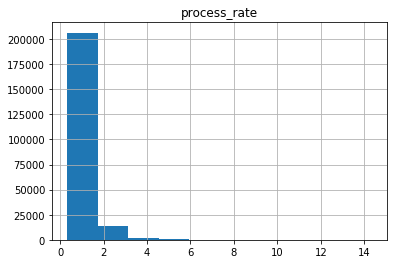

In [5]:
train_x.hist("process_rate")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B4A717E780>]],
      dtype=object)

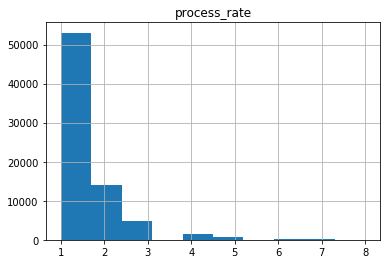

In [6]:
val_x.hist("process_rate")

In [37]:
train_set = pd.read_csv("dataset/train_val/training_set.csv")
test_set = pd.read_csv("dataset/train_val/testing_set.csv")
drop_col = [7,8,9,10,12,14,20,21,24] + list(range(61, 73))
drop_col = train_set.columns[drop_col]
#drop_col = ["home_part_of_day", "abroad_part_of_day", 'abroad_DoW', 'abroad_DoM', "abroad_DoY"]
#drop_col = train_set.columns[44:51]
train_set.drop(columns=drop_col, inplace=True)
test_set.drop(columns=drop_col, inplace=True)

"""drop_col = ['source1_source2', 'source1_unit', 'source2_unit',
            'source1_source2_unit', 'subline_area'"]
for table in [train_set, val_set, test_set]:
    table.drop(columns=drop_col, inplace=True)"""

'drop_col = [\'source1_source2\', \'source1_unit\', \'source2_unit\',\n            \'source1_source2_unit\', \'subline_area\'"]\nfor table in [train_set, val_set, test_set]:\n    table.drop(columns=drop_col, inplace=True)'

In [38]:
drop_col

Index(['source1_source2', 'source1_unit', 'source2_unit',
       'source1_source2_unit', 'order_month', 'order_quarter', 'subline_area',
       'begin_month', 'begin_quarter', 'abroad_airport', 'home_airport',
       'abroad_hour', 'abroad_part_of_day', 'abroad_DoY', 'abroad_DoW',
       'abroad_DoM', 'home_DoW', 'home_DoM', 'home_DoY', 'home_hour',
       'home_part_of_day'],
      dtype='object')

In [24]:
x = train_set.group_id.value_counts()
group_id_map = {}
for gpid, value in zip(x.index, x):
    group_id_map[gpid] = value
train_set["group_id_count"] = train_set.group_id.map(group_id_map)

In [25]:
#train_set.fillna("NaN", inplace=True)
#test_set.fillna("NaN", inplace=True)
y_train = train_set["deal_or_not"]
for table in [train_set, test_set]:
    table.drop(columns=["deal_or_not", "group_id", "order_id"], inplace=True)
    
#and "DoY" not in col
cat_feature = []
key_words = ["source", "unit", "sub", "area", "order", "begin", "_airport",
             "abroad", "home"]
for i, col in enumerate(train_set.columns):
    for kw in key_words:
        if kw in col and "duration" not in col and i not in cat_feature:
            cat_feature.append(i)

"""cv = StratifiedKFold(5, shuffle=True, random_state=851206)
mean_enc_col = ["source1_unit"] # 這個column是catboost feature importance最高的feature
train_set = mean_encoder(train_set, y_train, mean_enc_col, "deal_or_not", cv)
test_set = test_set_encoder(train_set, y_train, test_set, mean_enc_col, "deal_or_not")"""

'cv = StratifiedKFold(5, shuffle=True, random_state=851206)\nmean_enc_col = ["source1_unit"] # 這個column是catboost feature importance最高的feature\ntrain_set = mean_encoder(train_set, y_train, mean_enc_col, "deal_or_not", cv)\ntest_set = test_set_encoder(train_set, y_train, test_set, mean_enc_col, "deal_or_not")'

In [26]:
train_x, val_x, train_y, val_y = train_test_split(train_set, y_train, random_state=104702016,
                                                  shuffle=True, stratify=y_train)
"""cv = StratifiedKFold(5, shuffle=True, random_state=851206)
#mean_enc_col = ["source1_unit", "area", 'source1_source2', 'source1_source2_unit',
#                'source2_unit'] # 這個column是catboost feature importance最高的feature
mean_enc_col = ["source1_unit"]
#mean_enc_col = list(train_set.columns[cat_feature])
train_x = mean_encoder(train_x, train_y, mean_enc_col, "deal_or_not", cv)
val_x = test_set_encoder(train_x, train_y, val_x, mean_enc_col, "deal_or_not")

train_x.drop(columns=mean_enc_col, inplace=True)
val_x.drop(columns=mean_enc_col, inplace=True)"""

'cv = StratifiedKFold(5, shuffle=True, random_state=851206)\n#mean_enc_col = ["source1_unit", "area", \'source1_source2\', \'source1_source2_unit\',\n#                \'source2_unit\'] # 這個column是catboost feature importance最高的feature\nmean_enc_col = ["source1_unit"]\n#mean_enc_col = list(train_set.columns[cat_feature])\ntrain_x = mean_encoder(train_x, train_y, mean_enc_col, "deal_or_not", cv)\nval_x = test_set_encoder(train_x, train_y, val_x, mean_enc_col, "deal_or_not")\n\ntrain_x.drop(columns=mean_enc_col, inplace=True)\nval_x.drop(columns=mean_enc_col, inplace=True)'

In [13]:
#train_set.fillna("NaN", inplace=True)
train_pool = Pool(train_set, y_train, cat_feature)

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 200
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.05
params['counter_calc_method'] = 'SkipTest'
params['one_hot_max_size'] = 255


cv_data = cv(
    params = params,
    pool = train_pool,
    fold_count=10,
    inverted=False,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

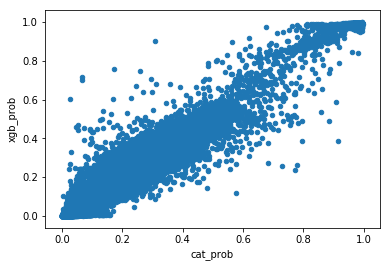

In [16]:
xgb_prob = xgb_nocat.predict_proba(val_x)
cat_prob = cat_cat.predict_proba(val_x)
val_prob = pd.DataFrame(columns=["cat_prob", "xgb_prob"])
val_prob["cat_prob"] = cat_prob[:, 1]
val_prob["xgb_prob"] = xgb_prob[:, 1]
val_prob.plot(kind="scatter", x="cat_prob", y="xgb_prob")

In [21]:
roc_auc_score(val_y, val_prob.mean(axis=1).values)

0.7452935588453974

In [18]:
param = {"objective": "binary:logistic",
             "max_depth": 6,
             "eta": 0.05,
             "n_estimators": 100,
             "silent": True,
             "tree_method": "gpu_hist",
             "seed": 104702016,
             "scale_pos_weight": 4
             }
#dtrain = xgb.DMatrix(train_set, label=train_y)
xgb_nocat = XGBClassifier(**param)
xgb_nocat.fit(train_x, train_y, eval_metric="auc",
                  eval_set=[(train_x, train_y), (val_x, val_y)],
                  verbose=True)

[0]	validation_0-auc:0.69849	validation_1-auc:0.696523
[1]	validation_0-auc:0.701916	validation_1-auc:0.700109
[2]	validation_0-auc:0.703435	validation_1-auc:0.701902
[3]	validation_0-auc:0.711018	validation_1-auc:0.711102
[4]	validation_0-auc:0.713555	validation_1-auc:0.713188
[5]	validation_0-auc:0.718014	validation_1-auc:0.716934
[6]	validation_0-auc:0.719793	validation_1-auc:0.718863
[7]	validation_0-auc:0.721002	validation_1-auc:0.719969
[8]	validation_0-auc:0.722791	validation_1-auc:0.721604
[9]	validation_0-auc:0.725611	validation_1-auc:0.723881
[10]	validation_0-auc:0.726708	validation_1-auc:0.724733
[11]	validation_0-auc:0.728077	validation_1-auc:0.725649
[12]	validation_0-auc:0.728636	validation_1-auc:0.726123
[13]	validation_0-auc:0.729548	validation_1-auc:0.727006
[14]	validation_0-auc:0.730667	validation_1-auc:0.727716
[15]	validation_0-auc:0.731277	validation_1-auc:0.728282
[16]	validation_0-auc:0.73202	validation_1-auc:0.728783
[17]	validation_0-auc:0.733072	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.05, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=4, seed=104702016, silent=True,
       subsample=1, tree_method='gpu_hist')

In [118]:
xgb_prob = xgb_nocat.predict_proba(val_x)

In [99]:
xgb_nocat.fit(train_set, y_train, eval_metric="auc", verbose=True)
xgb_pred = xgb_nocat.predict_proba(test_set)
xgb_output = pd.read_csv("testing-set.csv")
xgb_output["deal_or_not"] = xgb_pred[:, 1]
xgb_output.to_csv("xgb_nocat.csv", encoding="utf-8", index=False)

In [20]:
train2_x = train_x.copy()
val2_x = val_x.copy()
for col in train_x.columns[cat_feature]:
    train2_x[col] = train_x[col].astype(str)
    val2_x[col] = val_x[col].astype(str)

In [8]:
drop_feat = ['airport_amount']
train2_x = train_x.drop(columns=drop_feat)
val2_x = val_x.drop(columns=drop_feat)

In [9]:
# full mean encoding
cat_cat = CatBoostClassifier(
    learning_rate=0.05,
    #od_type="Iter",
    #od_wait=20,
    iterations=500,
    random_seed=104702016,
    eval_metric = 'AUC:hints=skip_train~false',
    counter_calc_method='SkipTest',
    #max_ctr_complexity=1,
    one_hot_max_size=255
)
cat_cat.fit(
    train_x, train_y,
    cat_features=cat_feature,
    eval_set=(val_x, val_y),
    plot=True,
    logging_level='Silent',
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [7]:
# full mean encoding
cat_cat = CatBoostClassifier(
    learning_rate=0.05,
    #od_type="Iter",
    #od_wait=20,
    iterations=500,
    random_seed=104702016,
    eval_metric = 'AUC:hints=skip_train~false',
    counter_calc_method='SkipTest',
    scale_pos_weight=5,
    #max_ctr_complexity=1,
    one_hot_max_size=40
)
cat_cat.fit(
    train_x, train_y,
    cat_features=cat_feature,
    eval_set=(val_x, val_y),
    plot=True,
    logging_level='Silent',
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [37]:
drop_col = [x for x in train_x.columns if "flight_dist" in x]
new_train_x = train_x.drop(columns=drop_col)
new_val_x = val_x.drop(columns=drop_col)

new_cat_feature = []
key_words = ["source", "unit", "sub", "area", "order", "begin", "_airport",
             "abroad", "home"]
for i, col in enumerate(new_train_x.columns):
    for kw in key_words:
        if kw in col and "duration" not in col and "DoY" not in col and "target" not in col \
         and "accum" not in col and "_z" not in col and i not in cat_feature:
            new_cat_feature.append(i)

In [29]:
new_train_x = train_x.drop(columns=["source1_count", "source2_count"])
new_val_x = val_x.drop(columns=["source1_count", "source2_count"])
new_cat_feature = []
key_words = ["source", "unit", "sub", "area", "order", "begin", "_airport",
             "abroad", "home"]
for i, col in enumerate(new_train_x.columns):
    for kw in key_words:
        if kw in col and "duration" not in col and "DoY" not in col and "target" not in col \
         and "accum" not in col and "_z" not in col and i not in cat_feature:
            new_cat_feature.append(i)

In [94]:
train_x.columns[cat_feature]

Index(['source_1', 'source_2', 'unit', 'order_year', 'sub_line', 'area',
       'begin_DoW'],
      dtype='object')

In [7]:
# full mean encoding
cat_cat = CatBoostClassifier(
    learning_rate=0.05,
    #od_type="Iter",
    #od_wait=20,
    iterations=500,
    random_seed=104702016,
    eval_metric = 'AUC:hints=skip_train~false',
    counter_calc_method='SkipTest',
    
    #max_ctr_complexity=1,
    one_hot_max_size=0
)
cat_cat.fit(
    train_x, train_y,
    cat_features=cat_feature,
    eval_set=(val_x, val_y),
    plot=True,
    logging_level='Silent',
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [7]:
blend_train = pd.DataFrame(columns=["xgb_pred", "cat_pred"], index=range(train_x.shape[0]))
blend_train["xgb_pred"] = xgb_nocat.predict_proba(train_x)[:, 1]
blend_train["cat_pred"] = cat_cat.predict_proba(train_x)[:, 1]
roc_auc_score(train_y, blend_train.mean(axis=1))

0.7706938092679195

In [4]:
train_x.columns[np.argsort(cat_cat.feature_importances_)[::-1]]

Index(['group_id_count', 'source1_unit_mean_target', 'people_amount',
       'process_count', 'order_begin_duration', 'source_2',
       'accum_count_ratio', 'peopleamount_days', 'unit', 'peopleamount_price',
       'accum_order', 'area', 'obd_cfd_diff', 'source_1', 'cur_first_duration',
       'order_DoY', 'begin_DoY', 'flight_time_sum', 'area_days_z',
       'area_price_z', 'sub_line', 'fltime_price', 'days', 'price',
       'flight_dist_max', 'time_dist_std', 'subline_price_z', 'fldist_price',
       'flight_time_max', 'day_price', 'flight_time_mean', 'begin_DoW',
       'airport_price', 'fltime_days', 'time_dist_max', 'flight_time_min',
       'time_dist', 'time_dist_min', 'flight_dist_sum', 'flight_dist_mean',
       'airport_days', 'subline_days_z', 'fldist_days', 'flight_time_std',
       'time_dist_sum', 'order_year', 'flight_dist_min', 'flight_dist_std',
       'airport_amount', 'overall_price_z', 'overall_days_z'],
      dtype='object')

In [10]:
train2_x.columns[np.argsort(cat_cat.feature_importances_)[::-1]]

Index(['group_id_count', 'source1_unit_mean_target', 'people_amount',
       'order_begin_duration', 'source_2', 'accum_count_ratio',
       'peopleamount_price', 'peopleamount_days', 'source_1', 'unit',
       'accum_order', 'dst_mean_target_avg', 'days', 'sub_line', 'begin_DoY',
       'area', 'order_DoY', 'src_mean_target_max', 'src_mean_target_avg',
       'fltime_price', 'dst_mean_target_max', 'prod_vec_12', 'prod_vec_19',
       'flight_time_sum', 'prod_vec_13', 'prod_vec_4', 'prod_vec_9',
       'day_price', 'prod_vec_16', 'src_mean_target_std', 'prod_vec_7',
       'prod_vec_8', 'prod_vec_20', 'prod_vec_15', 'time_dist_std',
       'prod_vec_18', 'prod_vec_10', 'airport_days', 'prod_vec_3',
       'src_mean_target_min', 'dst_mean_target_std', 'time_dist',
       'airport_price', 'flight_time_max', 'prod_vec_2', 'prod_vec_14',
       'prod_vec_6', 'prod_vec_1', 'prod_vec_5', 'time_dist_max',
       'prod_vec_17', 'flight_time_std', 'price', 'prod_vec_11',
       'flight_dist_sum

In [27]:
# full mean encoding
cat_cat = CatBoostClassifier(
    learning_rate=0.05,
    #od_type="Iter",
    #od_wait=20,
    iterations=500,
    random_seed=104702016,
    eval_metric = 'AUC:hints=skip_train~false',
    counter_calc_method='SkipTest',
    #max_ctr_complexity=1,
    one_hot_max_size=255
)
cat_cat.fit(
    train_x, train_y,
    cat_features=cat_feature,
    eval_set=(val_x, val_y),
    plot=True,
    logging_level='Silent',
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [33]:
# partial mean encoding
cat_cat = CatBoostClassifier(
    learning_rate=0.05,
    #od_type="Iter",
    #od_wait=20,
    iterations=500,
    random_seed=104702016,
    eval_metric = 'AUC:hints=skip_train~false',
    counter_calc_method='SkipTest',
    #max_ctr_complexity=1,
    #one_hot_max_size=255
)
cat_cat.fit(
    train_x, train_y,
    cat_features=cat_feature,
    eval_set=(val_x, val_y),
    plot=True,
    logging_level='Silent',
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [12]:
train_set.columns[np.argsort(cat_cat.feature_importances_)[::-1]]

Index(['source1_source2', 'unit', 'people_amount', 'order_begin_duration',
       'source1_unit', 'source1_source2_unit', 'area', 'peopleamount_price',
       'source2_unit', 'peopleamount_days', 'day_price', 'sub_line',
       'begin_DoW', 'begin_month', 'fltime_price', 'prod_vec_13', 'prod_vec_8',
       'prod_vec_12', 'begin_DoY', 'prod_vec_19', 'prod_vec_3', 'source_2',
       'prod_vec_5', 'prod_vec_18', 'order_DoY', 'days', 'prod_vec_20',
       'prod_vec_7', 'prod_vec_15', 'prod_vec_4', 'flight_time_sum',
       'prod_vec_2', 'prod_vec_9', 'order_month', 'time_dist_max',
       'prod_vec_10', 'prod_vec_17', 'time_dist_std', 'prod_vec_6',
       'prod_vec_16', 'price', 'prod_vec_11', 'prod_vec_14', 'time_dist',
       'flight_time_mean', 'airport_price', 'flight_dist_min', 'fltime_days',
       'source_1', 'prod_vec_1', 'flight_time_max', 'time_dist_sum',
       'time_dist_min', 'fldist_price', 'airport_days', 'flight_time_std',
       'order_quarter', 'flight_dist_max', 'fldist_

In [107]:
cat_prob = cat_cat.predict_proba(val2_x)[:, 1]
roc_auc_score(val_y, cat_prob)

0.7346347271118303

In [18]:
cat_cat = CatBoostClassifier(
    learning_rate=0.05,
    #od_type="Iter",
    #od_wait=20,
    iterations=500,
    random_seed=104702016,
    eval_metric = 'AUC:hints=skip_train~false',
    counter_calc_method='SkipTest',
    #one_hot_max_size=0
)
cat_cat.fit(
    train_x, train_y,
    cat_features=cat_feature,
    eval_set=(val_x, val_y),
    plot=True,
    logging_level='Silent',
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [24]:
cat_cat = CatBoostClassifier(
    learning_rate=0.05,
    #od_type="Iter",
    #od_wait=20,
    iterations=500,
    random_seed=104702016,
    eval_metric = 'AUC:hints=skip_train~false',
    counter_calc_method='SkipTest',
    one_hot_max_size=20
)
cat_cat.fit(
    train2_x, train_y,
    cat_features=cat_feature,
    eval_set=(val2_x, val_y),
    plot=True,
    logging_level='Silent',
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
train2_x.columns[np.argsort(cat_cat.feature_importances_)[::-1]]

Index(['source1_source2_unit_mean_target', 'people_amount',
       'source1_unit_mean_target', 'order_begin_duration',
       'source2_unit_mean_target', 'area', 'begin_month', 'home_hour',
       'area_mean_target', 'abroad_DoM', 'source1_source2_mean_target',
       'home_DoM', 'peopleamount_price', 'peopleamount_days', 'Unnamed: 0',
       'abroad_hour', 'day_price', 'days', 'abroad_airport', 'source_2',
       'order_DoY', 'source1_source2_unit', 'fltime_price', 'source2_unit',
       'unit', 'home_DoY', 'flight_time_sum', 'time_dist_std', 'fldist_price',
       'source_1', 'fltime_days', 'order_month', 'time_dist_max', 'price',
       'airport_price', 'sub_line', 'airport_days', 'begin_DoW', 'abroad_DoY',
       'source1_unit', 'flight_time_max', 'home_airport', 'source1_source2',
       'fldist_days', 'begin_DoY', 'flight_time_std', 'time_dist_min',
       'order_quarter', 'home_DoW', 'home_part_of_day', 'time_dist_sum',
       'time_dist', 'flight_dist_sum', 'abroad_part_of_day'

In [14]:
train2_x.columns[np.argsort(cat_cat.feature_importances_)[::-1]]

Index(['source1_source2_unit_mean_target', 'people_amount',
       'order_begin_duration', 'source2_unit_mean_target',
       'source1_unit_mean_target', 'area_mean_target', 'source1_source2',
       'source1_source2_mean_target', 'peopleamount_price',
       'peopleamount_days', 'day_price', 'area', 'source2_unit', 'sub_line',
       'source1_unit', 'days', 'home_hour', 'abroad_hour', 'flight_time_std',
       'home_airport', 'order_DoY', 'home_DoY', 'airport_price', 'abroad_DoM',
       'source_2', 'airport_days', 'unit', 'home_DoM', 'abroad_DoY',
       'abroad_airport', 'flight_time_sum', 'flight_time_mean',
       'flight_time_max', 'order_month', 'flight_time_min', 'price',
       'home_part_of_day', 'home_DoW', 'begin_DoY', 'flight_dist_sum',
       'flight_dist_min', 'flight_dist_mean', 'abroad_DoW', 'begin_DoW',
       'source_1', 'flight_dist_std', 'begin_month', 'flight_dist_max',
       'begin_quarter', 'abroad_part_of_day', 'order_quarter', 'subline_area',
       'order_ye

In [132]:
train_set.columns[np.argsort(cat_cat.feature_importances_)[::-1]]

Index(['source1_unit', 'people_amount', 'source1_source2_unit',
       'order_begin_duration', 'source1_source2', 'area', 'source2_unit',
       'source_2', 'peopleamount_price', 'source_1', 'unit', 'sub_line',
       'peopleamount_days', 'day_price', 'home_airport', 'abroad_hour',
       'order_DoY', 'days', 'airport_price', 'home_DoY', 'home_hour',
       'abroad_DoY', 'flight_time_sum', 'flight_dist_min', 'price',
       'abroad_DoM', 'flight_time_std', 'airport_days', 'flight_time_mean',
       'home_DoM', 'home_part_of_day', 'order_month', 'flight_dist_sum',
       'home_DoW', 'flight_time_min', 'flight_dist_max', 'begin_DoY',
       'flight_dist_mean', 'flight_time_max', 'abroad_airport', 'begin_month',
       'begin_DoW', 'abroad_part_of_day', 'flight_dist_std', 'order_quarter',
       'abroad_DoW', 'begin_quarter', 'airport_amount', 'order_year',
       'subline_area'],
      dtype='object')

In [119]:
cat_prob = cat_cat.predict_proba(val2_x)

In [121]:
np.corrcoef(cat_prob[:, 1], xgb_prob[:, 1])

array([[1.        , 0.93987745],
       [0.93987745, 1.        ]])

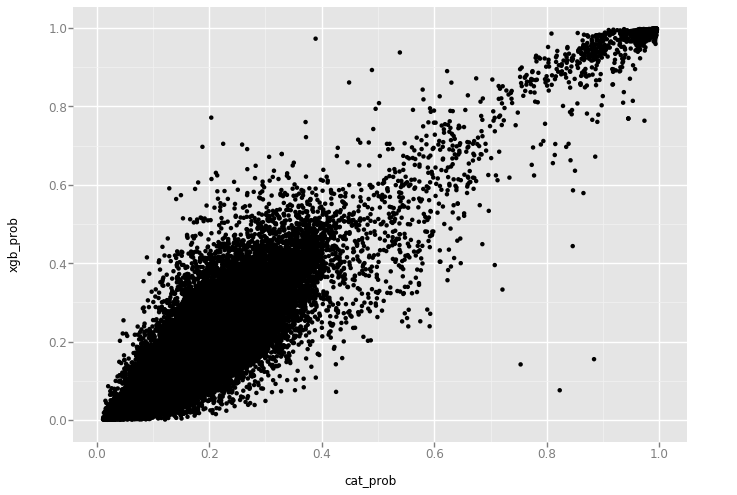

<ggplot: (-9223371851844046641)>

In [124]:
prob = pd.DataFrame(columns=["cat_prob", "xgb_prob"])
prob["cat_prob"] = cat_prob[:, 1]
prob["xgb_prob"] = xgb_prob[:, 1]
gplt.ggplot(prob, gplt.aes(x="cat_prob", y="xgb_prob")) \
 + gplt.geom_point()

In [82]:
cat_cat = CatBoostClassifier(
    learning_rate=0.05,
    iterations=500,
    random_seed=104702016,
    eval_metric = 'AUC',
    counter_calc_method='SkipTest',
    #one_hot_max_size=40
)
cat_cat.fit(
    train_set, y_train,
    cat_features=cat_feature,
    logging_level='Verbose',
)
cat_pred = cat_cat.predict_proba(test_set)
cat_output = pd.read_csv("testing-set.csv")
cat_output["deal_or_not"] = cat_pred[:, 1]
cat_output.to_csv("cat_meanencode.csv", encoding="utf-8", index=False)

0:	total: 241ms	remaining: 2m
1:	total: 465ms	remaining: 1m 55s
2:	total: 678ms	remaining: 1m 52s
3:	total: 868ms	remaining: 1m 47s
4:	total: 1.05s	remaining: 1m 43s
5:	total: 1.24s	remaining: 1m 41s
6:	total: 1.44s	remaining: 1m 41s
7:	total: 1.61s	remaining: 1m 39s
8:	total: 1.79s	remaining: 1m 37s
9:	total: 1.96s	remaining: 1m 35s
10:	total: 2.1s	remaining: 1m 33s
11:	total: 2.29s	remaining: 1m 33s
12:	total: 2.44s	remaining: 1m 31s
13:	total: 2.61s	remaining: 1m 30s
14:	total: 2.75s	remaining: 1m 28s
15:	total: 2.88s	remaining: 1m 27s
16:	total: 3.03s	remaining: 1m 26s
17:	total: 3.18s	remaining: 1m 25s
18:	total: 3.37s	remaining: 1m 25s
19:	total: 3.52s	remaining: 1m 24s
20:	total: 3.66s	remaining: 1m 23s
21:	total: 3.81s	remaining: 1m 22s
22:	total: 3.96s	remaining: 1m 22s
23:	total: 4.08s	remaining: 1m 20s
24:	total: 4.25s	remaining: 1m 20s
25:	total: 4.39s	remaining: 1m 20s
26:	total: 4.51s	remaining: 1m 19s
27:	total: 4.7s	remaining: 1m 19s
28:	total: 4.84s	remaining: 1m 18s
2

237:	total: 43.4s	remaining: 47.8s
238:	total: 43.6s	remaining: 47.6s
239:	total: 43.8s	remaining: 47.4s
240:	total: 44s	remaining: 47.3s
241:	total: 44.2s	remaining: 47.1s
242:	total: 44.4s	remaining: 46.9s
243:	total: 44.6s	remaining: 46.8s
244:	total: 44.8s	remaining: 46.6s
245:	total: 44.9s	remaining: 46.4s
246:	total: 45.1s	remaining: 46.2s
247:	total: 45.3s	remaining: 46s
248:	total: 45.5s	remaining: 45.9s
249:	total: 45.7s	remaining: 45.7s
250:	total: 45.9s	remaining: 45.5s
251:	total: 46.1s	remaining: 45.3s
252:	total: 46.3s	remaining: 45.2s
253:	total: 46.5s	remaining: 45.1s
254:	total: 46.7s	remaining: 44.9s
255:	total: 46.9s	remaining: 44.7s
256:	total: 47.1s	remaining: 44.5s
257:	total: 47.3s	remaining: 44.3s
258:	total: 47.5s	remaining: 44.2s
259:	total: 47.6s	remaining: 44s
260:	total: 47.8s	remaining: 43.8s
261:	total: 48s	remaining: 43.6s
262:	total: 48.2s	remaining: 43.4s
263:	total: 48.3s	remaining: 43.2s
264:	total: 48.5s	remaining: 43s
265:	total: 48.7s	remaining: 4

472:	total: 1m 26s	remaining: 4.94s
473:	total: 1m 26s	remaining: 4.75s
474:	total: 1m 26s	remaining: 4.57s
475:	total: 1m 27s	remaining: 4.39s
476:	total: 1m 27s	remaining: 4.21s
477:	total: 1m 27s	remaining: 4.02s
478:	total: 1m 27s	remaining: 3.84s
479:	total: 1m 27s	remaining: 3.66s
480:	total: 1m 27s	remaining: 3.47s
481:	total: 1m 28s	remaining: 3.29s
482:	total: 1m 28s	remaining: 3.11s
483:	total: 1m 28s	remaining: 2.92s
484:	total: 1m 28s	remaining: 2.74s
485:	total: 1m 28s	remaining: 2.56s
486:	total: 1m 29s	remaining: 2.38s
487:	total: 1m 29s	remaining: 2.19s
488:	total: 1m 29s	remaining: 2.01s
489:	total: 1m 29s	remaining: 1.83s
490:	total: 1m 29s	remaining: 1.65s
491:	total: 1m 29s	remaining: 1.46s
492:	total: 1m 30s	remaining: 1.28s
493:	total: 1m 30s	remaining: 1.1s
494:	total: 1m 30s	remaining: 914ms
495:	total: 1m 30s	remaining: 731ms
496:	total: 1m 30s	remaining: 548ms
497:	total: 1m 31s	remaining: 366ms
498:	total: 1m 31s	remaining: 183ms
499:	total: 1m 31s	remaining:

In [59]:
cat = CatBoostClassifier(
    learning_rate=0.05,
    iterations=976,
    random_seed=1051232,
    eval_metric = 'AUC',
    #counter_calc_method='SkipTest'
)
cat.fit(
    whole_train, whole_y,
    cat_features=cat_feature,
    logging_level='Verbose',
)
cat_pred2 = cat.predict_proba(test_set)
cat_output2 = pd.read_csv("testing-set.csv")
cat_output2["deal_or_not"] = cat_pred2[:, 1]
cat_output2.to_csv("cat_basicfeat.csv", encoding="utf-8", index=False)

0:	total: 262ms	remaining: 4m 15s
1:	total: 488ms	remaining: 3m 57s
2:	total: 661ms	remaining: 3m 34s
3:	total: 859ms	remaining: 3m 28s
4:	total: 1.03s	remaining: 3m 19s
5:	total: 1.23s	remaining: 3m 19s
6:	total: 1.38s	remaining: 3m 10s
7:	total: 1.58s	remaining: 3m 11s
8:	total: 1.75s	remaining: 3m 8s
9:	total: 1.96s	remaining: 3m 9s
10:	total: 2.07s	remaining: 3m 1s
11:	total: 2.29s	remaining: 3m 3s
12:	total: 2.46s	remaining: 3m 1s
13:	total: 2.61s	remaining: 2m 59s
14:	total: 2.81s	remaining: 2m 59s
15:	total: 3.02s	remaining: 3m 1s
16:	total: 3.2s	remaining: 3m
17:	total: 3.36s	remaining: 2m 59s
18:	total: 3.56s	remaining: 2m 59s
19:	total: 3.76s	remaining: 2m 59s
20:	total: 3.96s	remaining: 3m
21:	total: 4.15s	remaining: 2m 59s
22:	total: 4.34s	remaining: 2m 59s
23:	total: 4.49s	remaining: 2m 57s
24:	total: 4.68s	remaining: 2m 57s
25:	total: 4.81s	remaining: 2m 55s
26:	total: 4.92s	remaining: 2m 53s
27:	total: 5.13s	remaining: 2m 53s
28:	total: 5.28s	remaining: 2m 52s
29:	total:

232:	total: 47.5s	remaining: 2m 31s
233:	total: 47.7s	remaining: 2m 31s
234:	total: 47.9s	remaining: 2m 31s
235:	total: 48.1s	remaining: 2m 30s
236:	total: 48.3s	remaining: 2m 30s
237:	total: 48.5s	remaining: 2m 30s
238:	total: 48.7s	remaining: 2m 30s
239:	total: 48.9s	remaining: 2m 29s
240:	total: 49.1s	remaining: 2m 29s
241:	total: 49.3s	remaining: 2m 29s
242:	total: 49.5s	remaining: 2m 29s
243:	total: 49.7s	remaining: 2m 29s
244:	total: 49.9s	remaining: 2m 28s
245:	total: 50.1s	remaining: 2m 28s
246:	total: 50.3s	remaining: 2m 28s
247:	total: 50.5s	remaining: 2m 28s
248:	total: 50.8s	remaining: 2m 28s
249:	total: 51s	remaining: 2m 28s
250:	total: 51.1s	remaining: 2m 27s
251:	total: 51.4s	remaining: 2m 27s
252:	total: 51.5s	remaining: 2m 27s
253:	total: 51.8s	remaining: 2m 27s
254:	total: 52s	remaining: 2m 27s
255:	total: 52.2s	remaining: 2m 26s
256:	total: 52.4s	remaining: 2m 26s
257:	total: 52.6s	remaining: 2m 26s
258:	total: 52.8s	remaining: 2m 26s
259:	total: 53s	remaining: 2m 26

459:	total: 1m 35s	remaining: 1m 47s
460:	total: 1m 35s	remaining: 1m 47s
461:	total: 1m 36s	remaining: 1m 46s
462:	total: 1m 36s	remaining: 1m 46s
463:	total: 1m 36s	remaining: 1m 46s
464:	total: 1m 36s	remaining: 1m 46s
465:	total: 1m 36s	remaining: 1m 46s
466:	total: 1m 37s	remaining: 1m 45s
467:	total: 1m 37s	remaining: 1m 45s
468:	total: 1m 37s	remaining: 1m 45s
469:	total: 1m 37s	remaining: 1m 45s
470:	total: 1m 37s	remaining: 1m 45s
471:	total: 1m 38s	remaining: 1m 44s
472:	total: 1m 38s	remaining: 1m 44s
473:	total: 1m 38s	remaining: 1m 44s
474:	total: 1m 38s	remaining: 1m 44s
475:	total: 1m 39s	remaining: 1m 44s
476:	total: 1m 39s	remaining: 1m 43s
477:	total: 1m 39s	remaining: 1m 43s
478:	total: 1m 39s	remaining: 1m 43s
479:	total: 1m 39s	remaining: 1m 43s
480:	total: 1m 40s	remaining: 1m 43s
481:	total: 1m 40s	remaining: 1m 42s
482:	total: 1m 40s	remaining: 1m 42s
483:	total: 1m 40s	remaining: 1m 42s
484:	total: 1m 41s	remaining: 1m 42s
485:	total: 1m 41s	remaining: 1m 42s
4

684:	total: 2m 23s	remaining: 1m 1s
685:	total: 2m 24s	remaining: 1m
686:	total: 2m 24s	remaining: 1m
687:	total: 2m 24s	remaining: 1m
688:	total: 2m 24s	remaining: 1m
689:	total: 2m 24s	remaining: 1m
690:	total: 2m 25s	remaining: 59.9s
691:	total: 2m 25s	remaining: 59.7s
692:	total: 2m 25s	remaining: 59.5s
693:	total: 2m 25s	remaining: 59.2s
694:	total: 2m 26s	remaining: 59s
695:	total: 2m 26s	remaining: 58.8s
696:	total: 2m 26s	remaining: 58.6s
697:	total: 2m 26s	remaining: 58.4s
698:	total: 2m 26s	remaining: 58.2s
699:	total: 2m 27s	remaining: 58s
700:	total: 2m 27s	remaining: 57.8s
701:	total: 2m 27s	remaining: 57.6s
702:	total: 2m 27s	remaining: 57.4s
703:	total: 2m 28s	remaining: 57.2s
704:	total: 2m 28s	remaining: 57s
705:	total: 2m 28s	remaining: 56.8s
706:	total: 2m 28s	remaining: 56.6s
707:	total: 2m 28s	remaining: 56.4s
708:	total: 2m 29s	remaining: 56.1s
709:	total: 2m 29s	remaining: 55.9s
710:	total: 2m 29s	remaining: 55.7s
711:	total: 2m 29s	remaining: 55.5s
712:	total: 2

915:	total: 3m 14s	remaining: 12.7s
916:	total: 3m 14s	remaining: 12.5s
917:	total: 3m 14s	remaining: 12.3s
918:	total: 3m 14s	remaining: 12.1s
919:	total: 3m 15s	remaining: 11.9s
920:	total: 3m 15s	remaining: 11.7s
921:	total: 3m 15s	remaining: 11.5s
922:	total: 3m 15s	remaining: 11.2s
923:	total: 3m 15s	remaining: 11s
924:	total: 3m 16s	remaining: 10.8s
925:	total: 3m 16s	remaining: 10.6s
926:	total: 3m 16s	remaining: 10.4s
927:	total: 3m 16s	remaining: 10.2s
928:	total: 3m 17s	remaining: 9.97s
929:	total: 3m 17s	remaining: 9.76s
930:	total: 3m 17s	remaining: 9.54s
931:	total: 3m 17s	remaining: 9.33s
932:	total: 3m 17s	remaining: 9.12s
933:	total: 3m 18s	remaining: 8.91s
934:	total: 3m 18s	remaining: 8.7s
935:	total: 3m 18s	remaining: 8.49s
936:	total: 3m 18s	remaining: 8.28s
937:	total: 3m 19s	remaining: 8.06s
938:	total: 3m 19s	remaining: 7.85s
939:	total: 3m 19s	remaining: 7.64s
940:	total: 3m 19s	remaining: 7.43s
941:	total: 3m 19s	remaining: 7.21s
942:	total: 3m 20s	remaining: 7

In [90]:
train_set.columns[np.argsort(cat_cat.feature_importances_)[::-1]]

Index(['source1_source2', 'unit', 'people_amount', 'order_begin_duration',
       'source1_unit', 'area', 'source2_unit', 'source1_source2_unit',
       'source_2', 'peopleamount_price', 'peopleamount_days', 'source_1',
       'sub_line', 'day_price', 'home_airport', 'order_DoY', 'abroad_hour',
       'home_hour', 'days', 'price', 'abroad_DoM', 'airport_price',
       'flight_time_max', 'abroad_DoY', 'home_DoY', 'home_DoM',
       'flight_time_sum', 'flight_time_std', 'abroad_airport',
       'flight_time_mean', 'order_month', 'begin_DoY', 'airport_days',
       'home_DoW', 'flight_dist_min', 'begin_month', 'home_part_of_day',
       'flight_time_min', 'flight_dist_mean', 'abroad_DoW', 'flight_dist_sum',
       'flight_dist_max', 'flight_dist_std', 'begin_DoW', 'airport_amount',
       'order_year', 'begin_quarter', 'abroad_part_of_day', 'order_quarter',
       'subline_area'],
      dtype='object')

In [89]:
np.argsort(cat_cat.feature_importances_)

array([1.67597355e+00, 2.34470699e+00, 1.65584717e+01, 1.31070292e+01,
       1.91263024e+01, 5.76384039e+00, 3.10886904e+00, 2.68735624e+00,
       2.93389339e-02, 4.98731860e-01, 9.86005436e-01, 1.52936971e-02,
       1.55016089e+00, 3.50186669e+00, 8.68169383e-01, 8.04689763e-01,
       1.39000717e+00, 0.00000000e+00, 3.07904114e-01, 4.91578897e-01,
       9.34401027e-02, 2.85854560e-02, 6.03089968e-01, 5.05022613e-01,
       5.94051717e-01, 3.01922403e-01, 6.92573134e-01, 2.31544601e-01,
       2.87955777e-01, 1.92483198e-01, 3.92765475e-01, 2.00828201e-01,
       4.08475663e-02, 5.31071768e-01, 9.97871749e-01, 9.33373439e-01,
       2.33322462e-02, 6.58760346e-01, 2.48932262e-01, 7.63434257e-01,
       4.51517491e-01, 6.21067515e-01, 6.42333873e-01, 9.30310566e-01,
       3.05159974e-01, 8.61512930e+00, 4.90580140e-01, 7.54914686e-01,
       1.91666387e+00, 2.13414001e+00])

In [47]:
whole_train.columns[cat_feature]

Index(['source_1', 'source_2', 'unit', 'source1_source2', 'source1_unit',
       'source2_unit', 'source1_source2_unit', 'order_year', 'order_month',
       'order_quarter', 'sub_line', 'area', 'subline_area', 'begin_month',
       'begin_DoW', 'begin_quarter'],
      dtype='object')

In [62]:
cat_test = CatBoostClassifier(
    use_best_model=True,
    learning_rate=0.05,
    od_type="Iter",
    od_wait=20,
    random_seed=0,
    eval_metric = 'AUC'
)
cat_test.fit(
    train_x,train_y,
    cat_features=cat_feature,
    eval_set=(val_x, val_y),
    plot=True,
    logging_level='Silent',
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 